In [ ]:
import pandas as pd
import numpy as np
import json

In [ ]:
meta = pd.read_csv('movies_metadata.csv', encoding='utf8', low_memory=False)
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
# 추천 데이터에 필요한 컬럼만 추림
meta = meta[['id', 'original_title', 'original_language', 'genres']]

# id 컬럼을 알아 보기 좋게 변경
meta = meta.rename(columns={'id' : 'movieId'})

# 영어로 된 데이터가 가장 많기 때문에, 영어로 된 데이터만 분류
meta = meta[meta['original_language'] == 'en']

meta.head()

,movieId,original_title,original_language,genres
0,862,Toy Story,en,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,Jumanji,en,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,Grumpier Old Men,en,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,Waiting to Exhale,en,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,Father of the Bride Part II,en,"[{'id': 35, 'name': 'Comedy'}]"


In [ ]:
ratings = pd.read_csv('ratings_small.csv', encoding='utf8')

ratings = ratings[['userId', 'movieId', 'rating']]
ratings.head()

,userId,movieId,rating
0,1,110.0,1.0
1,1,147.0,4.5
2,1,858.0,5.0
3,1,1221.0,5.0
4,1,1246.0,5.0


In [ ]:
ratings.describe()

,userId,movieId,rating
count,9.550492e+06,9.550491e+06,9.550491e+06
mean,4.930743e+04,1.598738e+04,3.528407e+00
std,2.840726e+04,3.127291e+04,1.061459e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,2.476100e+04,1.076000e+03,3.000000e+00
50%,4.918200e+04,2.611000e+03,3.500000e+00
75%,7.390900e+04,6.539000e+03,4.000000e+00
max,9.851900e+04,1.762710e+05,5.000000e+00


In [ ]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32269 entries, 0 to 45465
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movieId            32269 non-null  object
 1   original_title     32269 non-null  object
 2   original_language  32269 non-null  object
 3   genres             32269 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550492 entries, 0 to 9550491
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  float64
 2   rating   float64
dtypes: float64(2), int64(1)
memory usage: 218.6 MB


In [ ]:
# movieId를 object -> int 형태로 가공
meta.movieId = pd.to_numeric(meta.movieId, errors='coerce')
ratings.movieId = pd.to_numeric(meta.movieId, errors='coerce')

In [ ]:
# genres가 json 형태로 string으로 저장
# 이를 배열 형태로, 장르만 뽑아내서 리스트에 담아주고, 
# apply 함수를 활용해서 각 행마다 해당 함수를 적용시키게끔

def parse_genres(genres_str):
    genres = json.loads(genres_str.replace('\'', '"'))

    genres_list = []
    for g in genres:
        genres_list.append(g['name'])

    return genres_list

meta['genres'] = meta['genres'].apply(parse_genres)

In [ ]:
meta.head()

,movieId,original_title,original_language,genres
0,862,Toy Story,en,"[Animation, Comedy, Family]"
1,8844,Jumanji,en,"[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,en,"[Romance, Comedy]"
3,31357,Waiting to Exhale,en,"[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,en,[Comedy]


In [ ]:
# 두 df를 movieId를 기준으로 inner 방식을 활용해서 merge. 

data = pd.merge(ratings, meta, on='movieId', how='inner')
data.head(10)

,userId,movieId,rating,original_title,original_language,genres
0,1,862.0,1.0,Toy Story,en,"[Animation, Comedy, Family]"
1,1,8844.0,4.5,Jumanji,en,"[Adventure, Fantasy, Family]"
2,1,15602.0,5.0,Grumpier Old Men,en,"[Romance, Comedy]"
3,1,31357.0,5.0,Waiting to Exhale,en,"[Comedy, Drama, Romance]"
4,1,11862.0,5.0,Father of the Bride Part II,en,[Comedy]
5,1,949.0,4.0,Heat,en,"[Action, Crime, Drama, Thriller]"
6,1,11860.0,4.5,Sabrina,en,"[Comedy, Romance]"
7,1,45325.0,5.0,Tom and Huck,en,"[Action, Adventure, Drama, Family]"
8,1,9091.0,4.0,Sudden Death,en,"[Action, Adventure, Thriller]"
9,1,710.0,4.0,GoldenEye,en,"[Adventure, Action, Thriller]"


In [ ]:
# 피벗 테이블 생성

matrix = data.pivot_table(index='userId', columns='original_title', values='rating')
matrix.tail(20)

original_title,!Women Art Revolution,#1 Cheerleader Camp,#chicagoGirl,$ Dollars,$5 a Day,$50K and a Call Girl: A Love Story,$9.99,$ellebrity,'49-'17,'71,'Gator Bait,'Master Harold'... and the Boys,'Neath the Arizona Skies,'R Xmas,'Tis the Season for Love,'Twas the Night,'Twas the Night Before Christmas,"'night, Mother",(500) Days of Summer,(A)Sexual,(Dis)Honesty: The Truth About Lies,(Entlastungen) Pipilottis Fehler,(T)ERROR,(Untitled),*batteries not included,+1,...All the Marbles,...And Justice for All,...And the Pursuit of Happiness,...tick... tick... tick...,.hack Liminality: In the Case of Mai Minase,1,1 Chance 2 Dance,1 Mile to You,1 Night,1 P.M.,1-2-3-4 ou Les collants noirs,10,10 Attitudes,10 Cent Pistol,...,星国恋,李三腳威震地獄門,武俠,決裂,熱浪球愛戰,猛龍煞星,生きてゐる孫六,神奇侠侣,等一個人咖啡,给爸爸的信,美人鱼,舞妓Haaaan!!!,解救吴先生,軍旗はためく下に,銀河英雄伝説: わが征くは星の大海,雀聖,黑太陽731,黑社会2：以和为贵,공모자들,공범,꽃미남 연쇄 테러사건,나는 공무원이다,눈에는 눈 이에는 이,만신,미쓰 홍당무,빅매치,상의원,소녀,신기전,아기와 나,연애의 온도,영어완전정복,오감도,응징자,인형사,전설의 주먹,좋은 친구들,카페 느와르,태풍,포화 속으로
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## 피어슨 상관계수

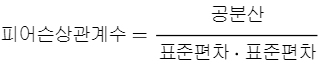

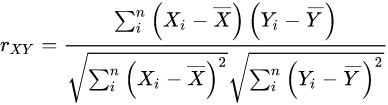

In [ ]:
# 피어슨 상관관계

GENRE_WEIGHT = 0.1

# s1 의 각 행에서 s1의 평균 값을 빼준다.
# (s1 * s2) 합 / 제곱근(s1의 제곱의 합 * s2 제곱의 합)
# 즉, 두 변수의 공분산을 각각의 표준편차의 곱으로 나눈 값
# 피어슨 상관계수 = 공분산 / 표준편차 * 표준편차

def pearsonR(s1, s2):
    s1_c = s1 - s1.mean()
    s2_c = s2 - s2.mean()
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))

In [ ]:
# 추천 함수 작성
            # 비교 대상 영화 타이틀/ 피벗 테이블 / 몇 개를 추천 받을 것인가 / 비슷한 장르에 가중치를 둘 것인가?  
def recommend(input_movie, matrix, n, similar_genre=True):
    
    # 가져온 타이틀의 장르를 추출
    input_genres = meta[meta['original_title'] == input_movie]['genres'].iloc(0)[0]
    
    # 결과를 담을 리스트 생성
    result = []
    
 
    for title in matrix.columns:
        # 가져온 타이틀과 input 영화가 같다면 건너뛰기
        if title == input_movie:
            continue

        # 피어슨 상관계수 계산
        cor = pearsonR(matrix[input_movie], matrix[title])

        # 장르를 비교
        if similar_genre and len(input_genres) > 0:
            temp_genres = meta[meta['original_title'] == title]['genres'].iloc(0)[0]
            # in1d -> 배열을 비교하여 같은 요소가 있으면 True를 반환
            same_count = np.sum(np.in1d(input_genres, temp_genres))
            # 같은 장르가 많을수록 더 높은 가중치 부여
            cor += (GENRE_WEIGHT * same_count)

        # 피어슨 상관계수의 값이 nan 값이라면 건너뛰기
        if np.isnan(cor):
            continue
        else:
            # 상관계수 값이 있다면 결과 리스트에 제목 / 상관계수 점수 / 해당 title의 장르 append
            result.append((title, '{:.2f}'.format(cor), temp_genres))
    # 위 과정이 끝나면 rating이 높은 순서대로 (내림차순) sorting
    result.sort(key=lambda r: r[1], reverse=True)
    # n개 만큼 반환
    return result[:n]

In [ ]:
# '다크 나이트'와 비슷한 장르의 영화를 10개를 추천, 장르는 비슷한 것일수록 좋다(가중치 부여)
recommend_result = recommend('The Dark Knight', matrix, 10, similar_genre=True)

pd.DataFrame(recommend_result, columns= ['Title', 'Correlation',' Genre'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


,Title,Correlation,Genre
0,The Package,0.90,"[Action, Adventure, Crime, Drama, Thriller]"
1,Jailbait,0.80,"[Crime, Drama, Thriller]"
2,Mata Hari,0.80,"[Drama, Action, Thriller, Romance]"
3,Cold Sweat,0.70,"[Thriller, Action]"
4,Party Monster,0.70,"[Comedy, Drama, Crime]"
5,Stuck,0.70,"[Crime, Horror, Mystery, Thriller]"
6,Thief,0.69,"[Action, Crime, Drama, Thriller]"
7,The Lost World,0.68,"[Adventure, Drama, Fantasy, Science Fiction]"
8,Broken Blossoms,0.60,"[Drama, Romance]"
9,Fear in the Night,0.60,"[Mystery, Thriller]"
